#과제 : 캔들 모형 + 보조지표를 활용한 매매

사용할 라이브러리:

1. 백테스팅용 라이브러리: Vectorbt

https://vectorbt.dev/

2. 캔들 모형 구현을 위한 라이브러리: Ta-lib

https://github.com/TA-Lib/ta-lib-python


3. 보조지표 구현을 위한 라이브러리: ta

https://github.com/bukosabino/ta

In [1]:
!pip install vectorbt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.7/485.7 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.1 MB/s eta 0:00:00
  Created wheel for vectorbt: filename=vectorbt-0.24.5-py3-none-any.whl size=526803 sha256=225a3d0be898947e70cb1978aaeef9d7679772609d85ee1dea5c199d56ef4b63
  Stored in directory: /root/.cache/pip/wheels/32/a8/75/4356ab56782d6ed50998d1c6d7798466dbc72aca9d8d5a4d9d
Successfully built vectorbt


In [2]:
!pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.9 MB/s eta 0:00:00


In [3]:
# download TA-Lib 
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 

--2023-02-20 14:50:08--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-20 14:50:09--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-20 14:50:09--  http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving pilotfibe

C:\Users\wkdgu\Downloads\ta-lib-0.4.0-msvc

In [4]:
!ls

sample_data  ta-lib-0.4.0-src.tar.gz


In [5]:
!tar xvzf ta-lib-0.4.0-src.tar.gz

ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/output.1
ta-lib/autom4te.cache/traces.0
ta-lib/autom4te.cache/traces.1
ta-lib/ltmain.sh
ta-lib/ta-lib-config.in
ta-lib/src/
ta-lib/src/ta_func/
ta-lib/src/ta_func/ta_MACDFIX.c
ta-lib/src/ta_func/ta_CDLPIERCING.c
ta-lib/src/ta_func/ta_DIV.c
ta-lib/src/ta_func/ta_ROCR100.c
ta-lib/src/ta_func/ta_ADXR.c
ta-lib/src/ta_func/ta_MAVP.c
ta-lib/src/ta_func/ta_CDLCLOSINGMARUBOZU.c
ta-lib/src/ta_func/ta_COSH.

In [6]:
!ls

sample_data  ta-lib  ta-lib-0.4.0-src.tar.gz


In [7]:
import os

In [8]:
os.chdir('ta-lib') # Can't use !cd in co-lab

In [9]:
!./configure --prefix=/usr

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [10]:
!make

Making all in src
make[1]: Entering directory '/content/ta-lib/src'
Making all in ta_abstract
make[2]: Entering directory '/content/ta-lib/src/ta_abstract'
/bin/bash ../../libtool --tag=CC   --mode=compile gcc -DHAVE_CONFIG_H -I. -I../../include  -I../ta_common/ -Iframes/   -g -O2 -MT libta_abstract_la-ta_group_idx.lo -MD -MP -MF .deps/libta_abstract_la-ta_group_idx.Tpo -c -o libta_abstract_la-ta_group_idx.lo `test -f 'ta_group_idx.c' || echo './'`ta_group_idx.c
mkdir .libs
 gcc -DHAVE_CONFIG_H -I. -I../../include -I../ta_common/ -Iframes/ -g -O2 -MT libta_abstract_la-ta_group_idx.lo -MD -MP -MF .deps/libta_abstract_la-ta_group_idx.Tpo -c ta_group_idx.c  -fPIC -DPIC -o .libs/libta_abstract_la-ta_group_idx.o
 gcc -DHAVE_CONFIG_H -I. -I../../include -I../ta_common/ -Iframes/ -g -O2 -MT libta_abstract_la-ta_group_idx.lo -MD -MP -MF .deps/libta_abstract_la-ta_group_idx.Tpo -c ta_group_idx.c -o libta_abstract_la-ta_group_idx.o >/dev/null 2>&1
mv -f .deps/libta_abstract_la-ta_group_idx.Tpo .

In [11]:
!make install
# wait ~ 30s

Making install in src
make[1]: Entering directory '/content/ta-lib/src'
Making install in ta_abstract
make[2]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /usr/bin/mkdir -p "/usr/include/ta-lib/"
 /usr/bin/install -c -m 644 '../../include/ta_defs.h' '/usr/include/ta-lib//ta_defs.h'
 /usr/bin/install -c -m 644 '../../include/ta_libc.h' '/usr/include/ta-lib//ta_libc.h'
 /usr/bin/install -c -m 644 '../../include/ta_abstract.h' '/usr/include/ta-lib//ta_abstract.h'
make[3]: Leaving directory '/content/ta-lib/src/ta_abstract'
make[2]: Leaving directory '/content/ta-lib/src/ta_abstract'
Making install in ta_common
make[2]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /usr/bin/mkdir -p "/usr/

In [12]:
os.chdir('../')

In [13]:
!ls

sample_data  ta-lib  ta-lib-0.4.0-src.tar.gz


In [14]:
!pip install TA-Lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.0/272.0 KB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=TA_Lib-0.4.25-cp38-cp38-linux_x86_64.whl size=2510046 sha256=f9b18e6fd2efed9cbf604f5488fa7c11fad8f8d8fe59d57203dcd1cdc58f0b86
  Stored in directory: /root/.cache/pip/wheels/da/72/bf/464831127ee8d6d9a5b76340a6a2f115182e159309dc3067ca
Successfully built TA-Lib


In [15]:
pip install --upgrade ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=e2fbef74a868dd1bd1cb2c4c2bdb691462434e3bb03cda66f17bb7de3a8c06e7
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta


In [41]:
import vectorbt as vbt
import yfinance as yf
import talib

data = yf.download("BTC-USD", start='2020-01-01',end='2022-01-01')
print(data)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2020-01-01   7194.892090   7254.330566   7174.944336   7200.174316   
2020-01-02   7202.551270   7212.155273   6935.270020   6985.470215   
2020-01-03   6984.428711   7413.715332   6914.996094   7344.884277   
2020-01-04   7345.375488   7427.385742   7309.514160   7410.656738   
2020-01-05   7410.451660   7544.497070   7400.535645   7411.317383   
...                  ...           ...           ...           ...   
2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969   
2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469   
2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938   
2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000   
2021-12-31  47169.371094  48472.527344  45819.953125  46306.445312   

               Adj C

#예시) 

##망치형 캔들 / 역망치형 캔들을 이용해서 매매 시그널 포착하기

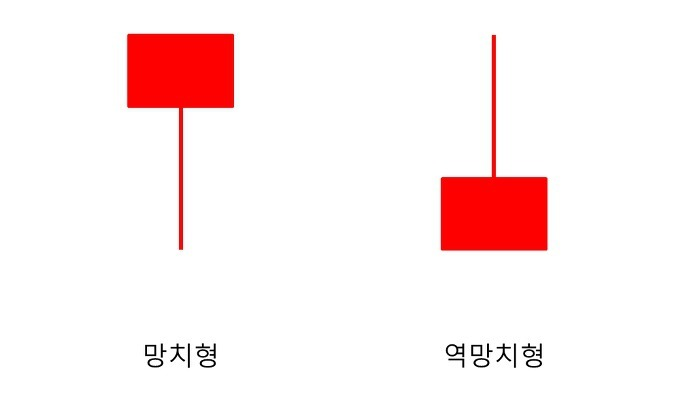

##매수 시그널: 망치형

① 아래 꼬리가 몸통의 2배 이상 만들어진 형태이다.

② 추세의 천정권이나 바닥권에서 발생하는 경우 추세전환 신호이다.

③ 거래량이 수반되어야 신뢰도가 높다.

④ 하락추세 중에 발생하면 상승추세로 전환될 가능성이 매우 높다.

⑤ 급격한 상승중에 발생하면 세력들의 물량이 소량 출회되었다는 해석이 가능하므로 다음날 반드시 추세를 확인해야 한다.


In [91]:
#Buy Signal을 잡기 위해 망치형 캔들을 이용한다다
hammer = talib.CDLHAMMER(data.Open, data.High, data.Low, data.Close)

So what this is going to do is print either 0, 100, -100.

If 100, it is a bullish signal

If -100, it is a bearish signal

if 0, nothing

In [87]:
#망치형 시그널이 잘 들어왔는지 확인해보기
print(hammer[hammer==100])

Date
2020-02-20    100
2020-02-22    100
2020-03-16    100
2020-04-01    100
2020-04-13    100
2020-06-07    100
2020-07-10    100
2020-08-22    100
2020-11-14    100
2020-11-22    100
2020-12-09    100
2020-12-11    100
2021-01-20    100
2021-01-26    100
2021-03-16    100
2021-10-17    100
2021-11-06    100
dtype: int32


2021-11-06 에 망치형이 나왔다고 한다. 실제 차트와 비교해보자

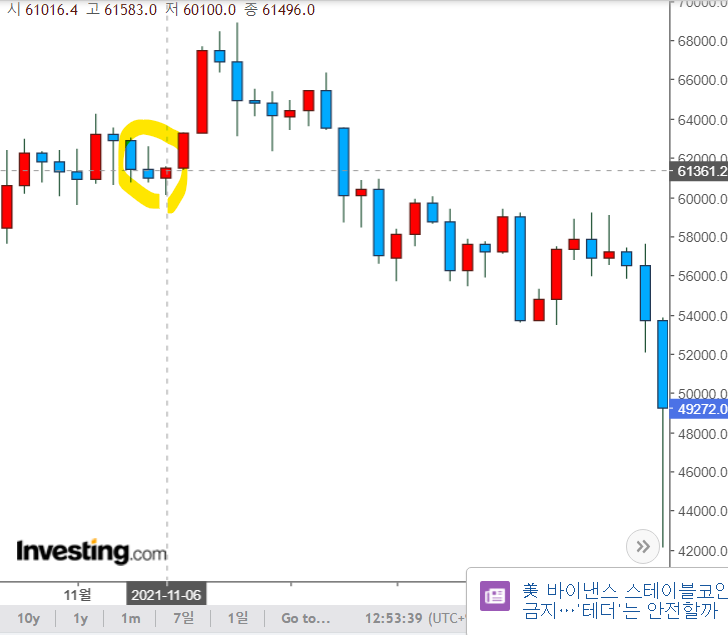

정확히 시그널을 포착한 것을 볼 수 있다

##매도 시그널: 역망치형

① 망치형의 반대모양이다.

② 하락추세 중에 발생하면 상승추세로의 전환신호이다.

③ 고가권에서 발생하면 단기 조정을 암시한다.

In [44]:
#Sell Signal을 잡기 위해 역망치형 캔들을 이용한다
hanging_man =talib.CDLHANGINGMAN(data.Open, data.High, data.Low, data.Close)

In [45]:
#망치형 시그널이 잘 들어왔는지 확인해보기
print(hanging_man[hanging_man==-100])

Date
2020-01-13   -100
2020-02-08   -100
2020-02-22   -100
2020-04-01   -100
2020-04-09   -100
2020-04-28   -100
2020-06-08   -100
2020-08-23   -100
2020-09-07   -100
2020-09-27   -100
2020-12-06   -100
2020-12-29   -100
2021-03-06   -100
2021-03-08   -100
2021-08-28   -100
2021-12-06   -100
dtype: int32


##!!!!!!!!!!!!!!!!!!!보조지표 시그널 넣기!!!!!!!!!!!!!!!!!!!!!!!!

In [80]:
#----------------------------------------------------------------------------------------
import ta

'''참고로 df['High'] 과 df.High 는 똑같다'''
data['%K'] = ta.momentum.stoch(data.High,data.Low,data.Close,window=14,smooth_window=3)
data['%D'] = data['%K'].rolling(3).mean()

#RSI 지표 
data['rsi'] = ta.momentum.rsi(data.Close,window=14)

#----------------------------------------------------------------------------------------

False

In [123]:
#Boolean 값으로 나온다
buys = (hammer == 100) & (data['rsi'] <= 50) #-------------------------------------------보조지표 시그널 같이 넣기--------------------------------------------

sells = (hanging_man == -100) & (data['rsi'] >= 70)  #--------------------------------------------보조지표 시그널 같이 넣기--------------------------------------------

In [125]:
#예견 편향을 방지하기 위해 
portfolio = vbt.Portfolio.from_signals(data.Close,buys,sells)

In [126]:
print(portfolio.stats())

Start                         2020-01-01 00:00:00
End                           2021-12-31 00:00:00
Period                          731 days 00:00:00
Start Value                                 100.0
End Value                              775.808568
Total Return [%]                       675.808568
Benchmark Return [%]                   543.129503
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                         53.06185
Max Drawdown Duration           188 days 00:00:00
Total Trades                                    2
Total Closed Trades                             1
Total Open Trades                               1
Open Trade PnL                         230.140072
Win Rate [%]                                100.0
Best Trade [%]                         445.668496
Worst Trade [%]                        445.668496
Avg Winning Trade [%]                  445.668496
Avg Losing Trade [%]                          NaN


##결과 분석하기 : 

생각보다 Market Return에 비해 너무 수익률이 좋지 않다. 매매 전략에 변화를 줘야한다.

In [25]:
portfolio.plot().show()

해결방안 1) 일봉 말고 1시간봉을 이용해보기!

In [26]:
from datetime import datetime,timedelta

end_time = datetime.now()
start_time = end_time - timedelta(days=50)

data = yf.download('BTC-USD',start=start_time,end=end_time,interval='1h')

#Buy Signal을 잡기 위해 망치형 캔들을 이용한다다
hammer = talib.CDLHAMMER(data.Open, data.High, data.Low, data.Close)

#Sell Signal을 잡기 위해 역망치형 캔들을 이용한다
hanging_man =talib.CDLHANGINGMAN(data.Open, data.High, data.Low, data.Close)

#Boolean 값으로 나온다
buys = (hammer == 100)  # macd > 0  
sells = (hanging_man == -100) #& rsi > 70 & macd < 0

#예견 편향을 방지하기 위해 
portfolio = vbt.Portfolio.from_signals(data.Close,buys,sells,fees=0.005)

print(portfolio.stats())

[*********************100%***********************]  1 of 1 completed
Start                         2023-01-01 14:00:00+00:00
End                           2023-02-20 14:00:00+00:00
Period                                 50 days 01:00:00
Start Value                                       100.0
End Value                                     98.841532
Total Return [%]                              -1.158468
Benchmark Return [%]                          50.538574
Max Gross Exposure [%]                            100.0
Total Fees Paid                               17.647614
Max Drawdown [%]                              18.070999
Max Drawdown Duration                  33 days 00:00:00
Total Trades                                         17
Total Closed Trades                                  17
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  23.529412
Best Trade [%]                     

해결방안 2) 10일 Window

1월 1일 ~ 10일까지의 매매 결과,

1월 2일 ~ 11일까지의 매매 결과,

1월 3일 ~ 12일까지의 매매 결과, .

.......쭉 진행한다 ( 12월 31일까지!)

In [27]:
window_length = 240

strategy_returns = []

basic_returns = []

for x in range(0,len(data) - window_length, 24):
  
  window_data = data.iloc[x:x+window_length]

  hammer = talib.CDLHAMMER(window_data.Open,window_data.High, window_data.Low,window_data.Close)

  hanging_man = talib.CDLHANGINGMAN(window_data.Open, window_data.High, window_data.Low,window_data.Close)

  buys = (hammer==100)

  sells = (hanging_man == -100)

  pf = vbt.Portfolio.from_signals(window_data.Close, buys, sells, fees = 0.005)

  strategy_returns.append(pf.total_return())
  basic_returns.append((window_data.Close.iloc[-1]/window_data.Close.iloc[0]) - 1)

print('Average return of our Strategy: ', sum(strategy_returns)/len(strategy_returns))

print('Average return of the Benchmark: ', sum(basic_returns)/len(basic_returns))

Average return of our Strategy:  0.003230885759387162
Average return of the Benchmark:  0.08506373617821497


구체적인 매매 날짜 알아보기

In [28]:
trade_records =pf.trades.records_readable
print(trade_records.sort_values("Entry Timestamp").to_string())

   Exit Trade Id  Column      Size           Entry Timestamp  Avg Entry Price  Entry Fees            Exit Timestamp  Avg Exit Price  Exit Fees       PnL    Return Direction  Status  Position Id
0              0       0  0.004584 2023-02-11 17:00:00+00:00     21706.656250    0.497512 2023-02-14 21:00:00+00:00    22247.380859   0.509906  1.471243  0.014786      Long  Closed            0
1              1       0  0.004091 2023-02-16 05:00:00+00:00     24681.328125    0.504832 2023-02-18 05:00:00+00:00    24627.357422   0.503728 -1.229344 -0.012176      Long  Closed            1
2              2       0  0.004073 2023-02-19 18:00:00+00:00     24488.441406    0.498716 2023-02-19 20:00:00+00:00    24522.250000   0.499404 -0.860416 -0.008626      Long  Closed            2
3              3       0  0.004080 2023-02-20 01:00:00+00:00     24238.201172    0.494435 2023-02-20 05:00:00+00:00    24476.654297   0.499299 -0.020893 -0.000211      Long  Closed            3
